In [1]:
# Python imports
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
# Imports from scripts
from scripts.figures import (
    label_kvnn, label_lambda, label_nucleus, set_rc_parameters
)
from scripts.integration import momentum_mesh
from scripts.momentum_distributions import (
    compute_normalization, load_momentum_distribution
)
from scripts.tools import convert_number_to_string, replace_periods

In [3]:
# Run this cell to turn on customized matplotlib graphics
set_rc_parameters()

In [4]:
def label_potential_lambda(kvnn, lamb):
    """Label for potential and SRG \lambda."""
    
    kvnn_label = label_kvnn(kvnn)
    lamb_label = rf"$({convert_number_to_string(lamb)})$"
    
    return kvnn_label + lamb_label

In [5]:
def single_nucleon_momentum_distribution_contributions(
        nucleus_name, nucleon, kvnn, lamb, x_limits=(0.0,6.0),
        y_limits=(1e-3,1e3), print_normalization=True, save_data=True
):
    """Plots momentum distributions showing I, \delta U + \delta U^\dagger, and
    \delta U \delta U^\dagger contributions.
    """
    
    # Initialize figure
    plt.close('all')
    f, ax = plt.subplots(figsize=(4, 4))

    # Load data from file
    (q_array, q_weights, n_array, _, n_I_array, n_delU_array, _,
     n_delU2_array, _) = load_momentum_distribution(nucleus_name, nucleon,
                                                    kvnn, lamb)
    
    # Print normalization?
    if print_normalization:

        total_norm = compute_normalization(q_array, q_weights, n_array)
        print(f"Total normalization = {total_norm}.")
        
        I_norm = compute_normalization(q_array, q_weights, n_I_array)
        print(f"I normalization = {I_norm}.")
        
        delU_norm = compute_normalization(q_array, q_weights, n_delU_array)
        print(f"\delta U + \delta U^\dagger normalization = {delU_norm}.")
        
        delU2_norm = compute_normalization(q_array, q_weights, n_delU2_array)
        print(f"\delta U \delta U^\dagger normalization = {delU2_norm}.")
        
        relative_error = np.abs(delU_norm + delU2_norm) / delU2_norm * 100
        print(f"Relative error = {relative_error}%.")
        
    # Save data?
    if save_data:
        
        data = np.vstack((q_array, q_weights, n_array)).T
        file_name = f"{nucleus_name}_{nucleon}_momentum_distribution"
        hdr = "q [fm^-1],   q weight [fm^-1],   n(q) [fm^3]\n"
        np.savetxt(file_name + '.txt', data, header=hdr)
        
    # Multiply by factor (2\pi)^3
    factor = (2*np.pi) ** 3
    n_array *= factor
    n_I_array *= factor
    n_delU_array *= factor
    n_delU2_array *= factor

    # Add to plot
    ax.semilogy(q_array, n_array, color='black', label='Total', linewidth=2.0,
                zorder=1)
    ax.semilogy(q_array, n_I_array, color='blue', label='I', linestyle='dotted',
                linewidth=2.0, zorder=2)
    ax.semilogy(
        q_array, np.abs(n_delU_array), color='green',
        label=r'$|\delta U+\delta U^\dagger|$', linestyle='dashed',
        linewidth=2.0, zorder=3
    )
    ax.semilogy(
        q_array, n_delU2_array, color='red',
        label=r'$\delta U \delta U^\dagger$', linestyle='dashdot',
        linewidth=2.0, zorder=4
    )
    
    # Set axes limits
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

    # Set axes labels
    ax.set_xlabel(r"$q$ [fm" + r'$^{-1}$' + ']', fontsize=16)
    if nucleon == 'proton':
        ylabel = r"$n_{p}(q)$ [fm" + r'$^3$' + ']'
    elif nucleon == 'neutron':
        ylabel = r"$n_{n}(q)$ [fm" + r'$^3$' + ']'
    ax.set_ylabel(ylabel, fontsize=16)

    # Set legend
    ax.legend(loc='upper right', fontsize=14, frameon=False)

    # Add nucleus label
    ax.add_artist(
        AnchoredText(label_nucleus(nucleus_name), loc='lower left',
                     prop=dict(size=18), frameon=False)
    )
    
    # Add potential and \lambda label
    ax.add_artist(
        AnchoredText(label_potential_lambda(kvnn, lamb), loc='center right',
                     prop=dict(size=18), frameon=False)
    );

In [6]:
kvnn = 6
lamb = 1.5

Total normalization = 3.9978158618315165.
I normalization = 3.999999999838172.
\delta U + \delta U^\dagger normalization = -0.3690665873543546.
\delta U \delta U^\dagger normalization = 0.36688244934769904.
Relative error = 0.5953236549033264%.


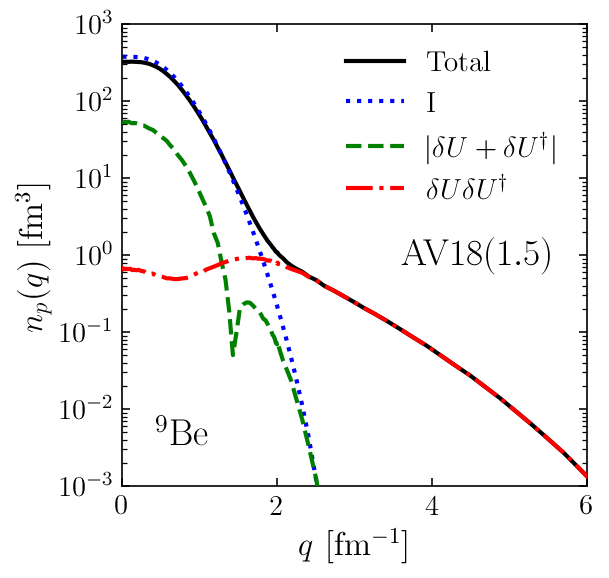

In [7]:
# Be9 proton
nucleus_name = 'Be9'
nucleon = 'proton'
single_nucleon_momentum_distribution_contributions(nucleus_name, nucleon, kvnn,
                                                   lamb)

Total normalization = 4.999424743494734.
I normalization = 4.999999999563087.
\delta U + \delta U^\dagger normalization = -0.37149779948527284.
\delta U \delta U^\dagger normalization = 0.37092254341692105.
Relative error = 0.15508792295355273%.


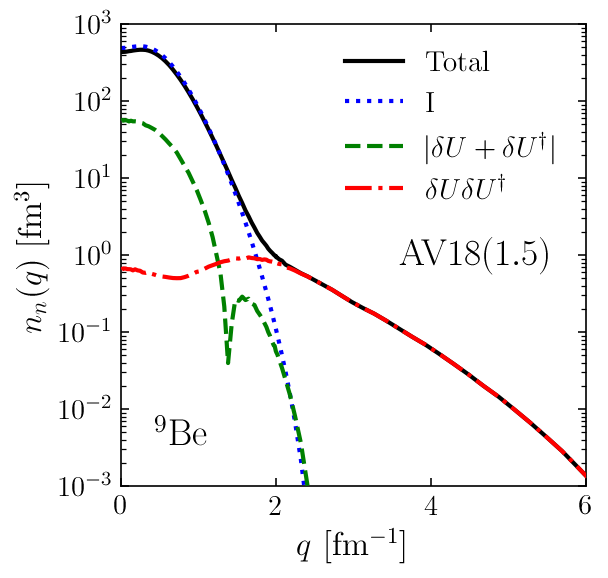

In [8]:
# Be9 neutron
nucleus_name = 'Be9'
nucleon = 'neutron'
single_nucleon_momentum_distribution_contributions(nucleus_name, nucleon, kvnn,
                                                   lamb)

Total normalization = 4.998912097632236.
I normalization = 5.000000000038483.
\delta U + \delta U^\dagger normalization = -0.45540297050789386.
\delta U \delta U^\dagger normalization = 0.45431506810164746.
Relative error = 0.23945989966658873%.


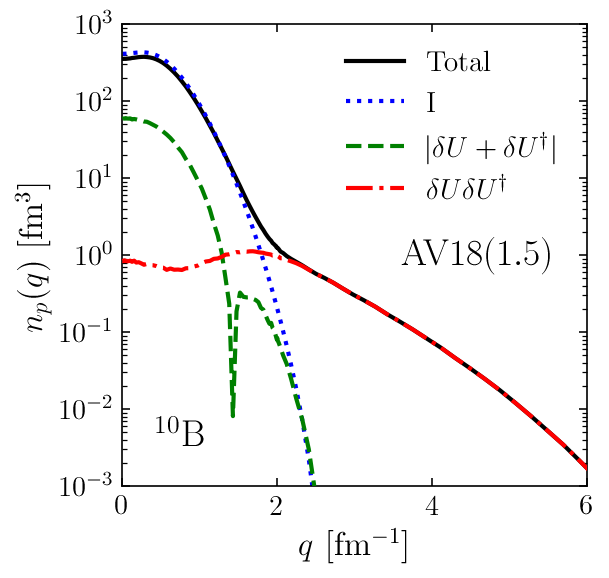

In [9]:
# B10 proton
nucleus_name = 'B10'
nucleon = 'proton'
single_nucleon_momentum_distribution_contributions(nucleus_name, nucleon, kvnn,
                                                   lamb)

Total normalization = 4.9977765195278145.
I normalization = 5.000000000151131.
\delta U + \delta U^\dagger normalization = -0.456125617830018.
\delta U \delta U^\dagger normalization = 0.45390213720670103.
Relative error = 0.48985903371157946%.


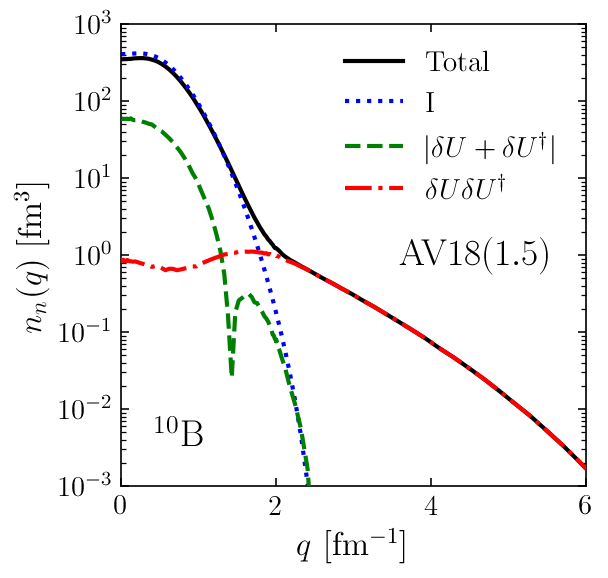

In [10]:
# B10 neutron
nucleus_name = 'B10'
nucleon = 'neutron'
single_nucleon_momentum_distribution_contributions(nucleus_name, nucleon, kvnn,
                                                   lamb)

Total normalization = 4.999529758707574.
I normalization = 4.9999999999510205.
\delta U + \delta U^\dagger normalization = -0.4904690433542512.
\delta U \delta U^\dagger normalization = 0.4899988021108051.
Relative error = 0.09596783531314465%.


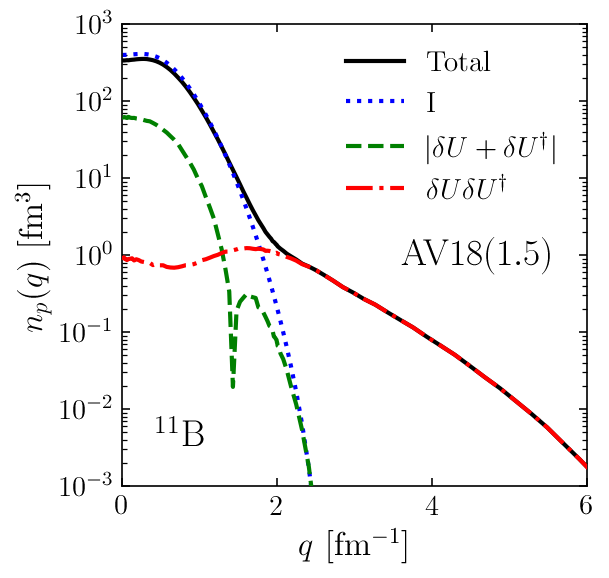

In [11]:
# B11 proton
nucleus_name = 'B11'
nucleon = 'proton'
single_nucleon_momentum_distribution_contributions(nucleus_name, nucleon, kvnn,
                                                   lamb)

Total normalization = 6.001868259713628.
I normalization = 6.000000000296987.
\delta U + \delta U^\dagger normalization = -0.49543866327413216.
\delta U \delta U^\dagger normalization = 0.49730692269077237.
Relative error = 0.3756753287349465%.


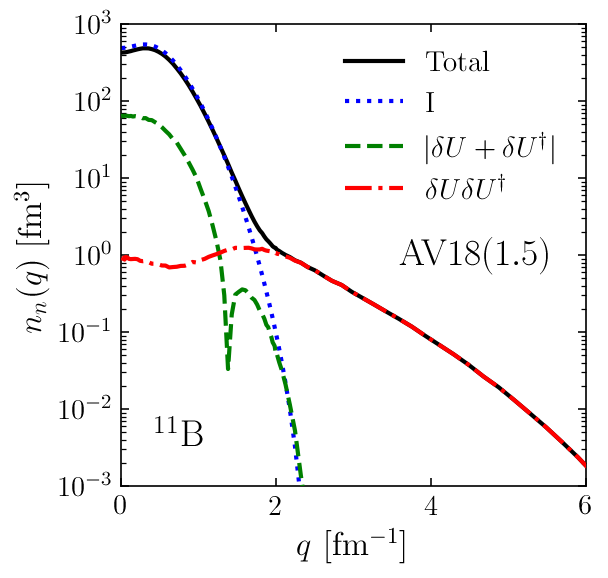

In [12]:
# B11 neutron
nucleus_name = 'B11'
nucleon = 'neutron'
single_nucleon_momentum_distribution_contributions(nucleus_name, nucleon, kvnn,
                                                   lamb)

Total normalization = 79.20318341571131.
I normalization = 78.99999999975786.
\delta U + \delta U^\dagger normalization = -13.078555653100029.
\delta U \delta U^\dagger normalization = 13.28173906905347.
Relative error = 1.5297952692570216%.


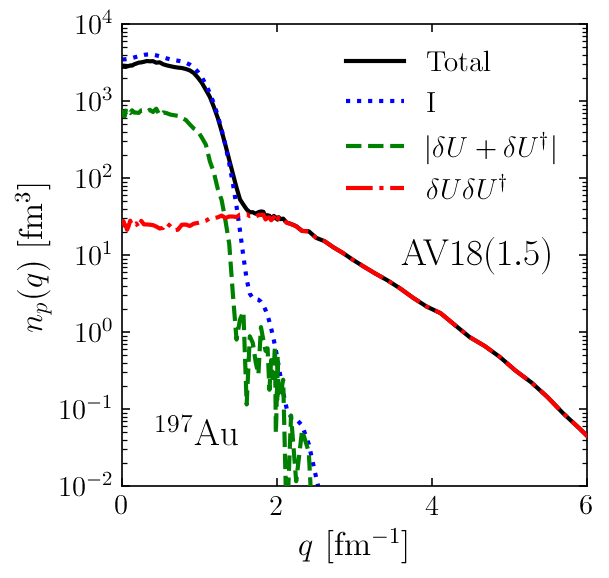

In [13]:
# Au197 proton
nucleus_name = 'Au197'
nucleon = 'proton'
single_nucleon_momentum_distribution_contributions(nucleus_name, nucleon, kvnn,
                                                   lamb, y_limits=(1e-2, 1e4))

Total normalization = 118.2863337862458.
I normalization = 117.99999999774396.
\delta U + \delta U^\dagger normalization = -13.77493519112559.
\delta U \delta U^\dagger normalization = 14.061268979627405.
Relative error = 2.036329643623694%.


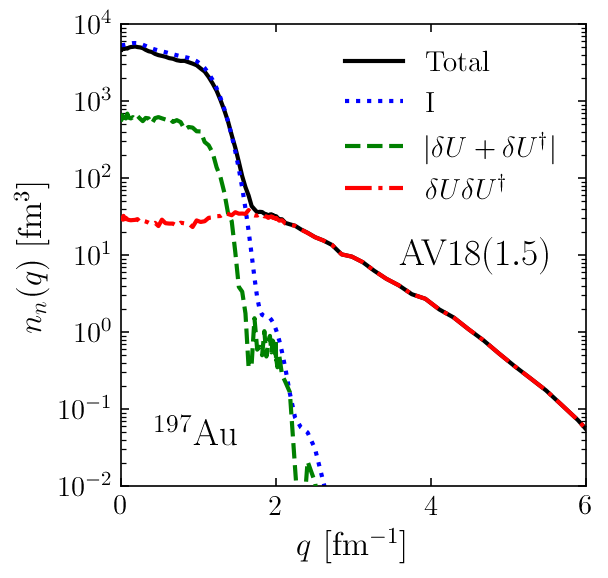

In [14]:
# Au197 neutron
nucleus_name = 'Au197'
nucleon = 'neutron'
single_nucleon_momentum_distribution_contributions(nucleus_name, nucleon, kvnn,
                                                   lamb, y_limits=(1e-2, 1e4))